In [6]:
from sklearn import datasets  , svm
iris=datasets.load_iris()

In [11]:
import pandas as pd
import numpy as np
df=pd.DataFrame(iris.data , columns=iris.feature_names)
df["flower"]= iris.target
df["flower"]= df["flower"].apply(lambda x: iris.target_names[x])
df[47:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(iris.data, iris.target, test_size=0.3)

In [19]:
model=svm.SVC(kernel="rbf", C=30, gamma="auto")
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9555555555555556

In [20]:
from sklearn.model_selection import cross_val_score

In [24]:
cross_val_score(svm.SVC(kernel="linear", C=10, gamma="auto"), iris.data, iris.target, cv=5)

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [25]:
cross_val_score(svm.SVC(kernel="rbf", C=20, gamma="auto"), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

In [26]:
cross_val_score(svm.SVC(kernel="rbf", C=30, gamma="auto"), iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.93333333, 1.        ])

In [28]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(svm.SVC(gamma="auto") , {
    "C":[1, 10, 20],
    "kernel":["rbf", "linear"],
    
}, cv=5, return_train_score=False )
clf.fit(iris.data, iris.target)
clf.cv_results_

{'mean_fit_time': array([0.00468245, 0.00060339, 0.00067801, 0.00061851, 0.00087724,
        0.00054636]),
 'std_fit_time': array([3.42719529e-03, 9.10652114e-05, 1.10673730e-04, 8.09774796e-05,
        4.59288863e-04, 3.05479614e-05]),
 'mean_score_time': array([0.00158968, 0.00039196, 0.0004622 , 0.00039611, 0.00079832,
        0.00038843]),
 'std_score_time': array([4.53247066e-04, 4.44999193e-05, 1.86293425e-04, 6.22501002e-05,
        7.89993529e-04, 5.56157318e-05]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'ker

In [29]:
df=pd.DataFrame(clf.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004682,0.003427,0.001590,0.000453,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.000603,0.000091,0.000392,0.000044,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.000678,0.000111,0.000462,0.000186,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.000619,0.000081,0.000396,0.000062,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.000877,0.000459,0.000798,0.000790,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5


In [30]:
df[["param_C", "param_kernel", "mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [ ]:
dir(clf)

In [32]:
clf.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [33]:
clf.best_params_

{'C': 1, 'kernel': 'rbf'}

In [34]:
clf.best_score_

0.9800000000000001

In [35]:
from sklearn.model_selection import RandomizedSearchCV
rs=RandomizedSearchCV(svm.SVC(gamma="auto"), {
    "C":[1, 10, 20],
    "kernel":["rbf", "linear"],
    
}, cv=5, return_train_score=False, n_iter=2)
rs.fit(iris.data, iris.target)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [36]:
pd.DataFrame(rs.cv_results_)[["param_C", "param_kernel", "mean_test_score"]]

,param_C,param_kernel,mean_test_score
0,20,rbf,0.966667
1,10,rbf,0.980000


In [10]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

In [6]:
from sklearn import datasets
digits = datasets.load_digits()
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

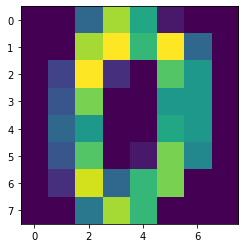

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(digits.images[0])

In [39]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
    },
    'naive_bayes_multinomial': {
        'model': MultinomialNB(),
        'params': {}
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }     
}

from sklearn.model_selection import GridSearchCV
import pandas as pd
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(digits.data, digits.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
})
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.947697,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.892620,{'n_estimators': 10}
2,logistic_regression,0.922114,{'C': 1}
3,naive_bayes_gaussian,0.806928,{}
4,naive_bayes_multinomial,0.870350,{}
5,decision_tree,0.798578,{'criterion': 'entropy'}


## Another Alternative through.  make_pipeline  ( failed )

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [26]:
model=make_pipeline(StandardScaler(), MultinomialNB())

In [28]:
model=DecisionTreeClassifier()
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
from tempfile import mkdtemp
from shutil import rmtree
from sklearn.externals.joblib import Memory
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_digits

/Users/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Create a temporary folder to store the transformers of the pipeline
cachedir = mkdtemp()
memory = Memory(cachedir=cachedir, verbose=10)

# the pipeline
pipe = Pipeline([('reduce_dim', PCA()),
                ('classify', LinearSVC())],
                memory=memory)
# models to try
param_grid = {"classify" : [LinearSVC(), ElasticNet()]}

# do the gridsearch on the models
grid = GridSearchCV(pipe, param_grid=param_grid)
digits = load_digits()
grid.fit(digits.data, digits.target)

# delete the temporary cache before exiting
rmtree(cachedir)

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# Define a pipeline to search for the best combination of PCA truncation
# and classifier regularization.
pca = PCA()
# set the tolerance to a large value to make the example faster
logistic = LogisticRegression(max_iter=10000, tol=0.1)
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits, y_digits = datasets.load_digits(return_X_y=True)


In [33]:
# Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {
    'pca__n_components': [5, 15, 30, 45, 64],
    'logistic__C': np.logspace(-4, 4, 4),
}
search = GridSearchCV(pipe, param_grid, n_jobs=-1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

# Plot the PCA spe

Best parameter (CV score=0.920):
{'logistic__C': 0.046415888336127774, 'pca__n_components': 45}


In [36]:
# Plot the PCA spectrum
pca.fit(X_digits)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

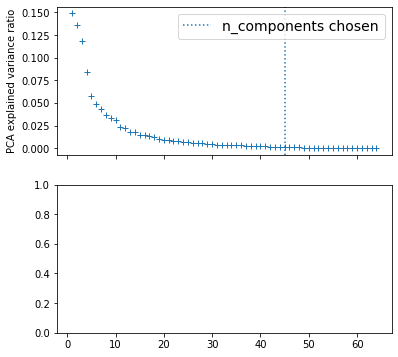

In [38]:

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(np.arange(1, pca.n_components_ + 1),pca.explained_variance_ratio_, '+', linewidth=2)
ax0.set_ylabel('PCA explained variance ratio')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components,linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=14))